# Chapter 05: Array-Based Sequences

## 5.1 Python's Sequence Types
This chapter covers Python's "sequence" classes, namely the built-in **list**, **tuple**, and **str** classes.
Significant commonality between theses classes are they support indexing to access an individual element of a sequence, using a syntax such as 
`seq[k]`, and each uses a low-level conceopt known as an **array** to represent the sequence. Regardless of this commonality,
there is a significant difference in their abstractions that these classes represent, and in the way that instances of these classes are represented internally by Python.


### Public Behaviors
### Implementation Details
### Asymptotic and Experimental Analyses


## 5.2 Low-Level Arrays
It is necessary to understand low-level copmuter architecture to understand the sequence types. 

[MEMORY FIGURE]

Eachbyte of memory is associated with a unique number that serves as its address. Memory addresses are typically coordinated
with the physical layout of the memory system.

Despite the sequential nature of the numbering system, computer can access memory by its address and that's why we call it a
RAM(random access memory). It is just easy to retrieve byte #3845 as it is to retrieve byte #1. In other words, we can say
any individual byte of memory can be stored or retrieved in $O(1)$ time.

In general, a programming language keeps track of the association between an identifier and the memory address in which the associated value is stored.
A group of related variables can be stored one after another in a contiguous portion of the computer's memory. We will denote such a representation as an **array**.


### 5.2.1 Referential Arrays
Python represents a list or tuple instance using an internal storage mechanism of array of object **references**. At the 
lowest level, what is stored is a consecutive sequence of memory addresses at which the elements of the sequence reside.
With this, Python can handle each element in fixed-length way even though the individual items may vary the number of bits used.

[Fig 5.5]
[Fig 5.6]

However, with a syntax such as `backup=list(primes)`, produces a new list that is a **shallow copy**. If elements are immutable, this point is moot. If the 
contents of the list were of a mutable type, a **deep copy**, meaning a new list with *new* elements, can be produced by using 
`deep copy` function from the `copy` module.

[Summary for deepcopy and shallow copy]


### 5.2.2 Compact Arrays in Python
Compact array is storing the bits that represent the primary data. IT has several advantages over referential structures in terms of computing performance. Most sginificantly, the 
overall memory usage will be much lower for a compact structure because there is no overhead devoted to the explicit storage of the sequence of memory references.
That is, a referential structure will typically use 64-bits for the memory address stored in the array, on top of whatever 
number of bits are used to represent a compact array within a string typically requires 2 bytes. If each character were 
stored independently as a one-character string, there would be significantly more bytes used. Python
allows to query the actual number of bytes being used for primary storage of any object by using `getsizeof` function of the `sys` module.

Another advantage to a compact structure for high-performance computing is that the primary data are stored consecutively in memory. Note that
this is not the case for a referential structure. Because of the workings of the cache and memory hierarchies of computers, it is often
advantageous to have data stored in memory near other data that might be used in the same computations.

Despite the apparent inefficiencies of referential structures, we will generally be content with the convenience of Python's list and tuples in this book.
The only place in which we consider alternatives will be in memory management section, which focuses on the impact of memory usage on data structures and algorithms. Python provides several means for creating compact arrays of various types.

Primary support for compact arrays is a module named `array`. That module defines a class, also named `array`, providing compact storage for arrays of primitive data types.


In [16]:
import array
import sys
x = [1, 3, 5, 7, 9]
print(sys.getsizeof(x))
y = array.array('i', [1, 2, 3, 4, 5])
print(sys.getsizeof(y))

104
84


The public interface for the `array` class conforms mostly to that part of a Python list. However, the constructur for the `array` class
requires a **type code** as a first parameter, which is a character  that designates the type of data that will be stored in the array.


## 5.3 Dynamic Arrays and Amortization

When creating a low-level array in a computer system, the precise size of that array bust be explcitly declared in order for the system
to properly allocate a consecutive piece of memory for its storage.

In the context of representing a PYthon `tuple` and `str` instance, it's not a problem since they are immutable, so the correct size for an 
underlying array can be fixed when the object is instantiated.

However, Python's `list` class presents a more interesting abstraction. ALthough a list has a particular length when constructed, the class allows us to add elements to the list, with no apparent limit on the overall capacity of the
list. To provide this abstraction, Python relies on an algorithm sleight of hand known as a **dynamic array**.

The first key to providing the semantics of a dynamic array is that a list instance maintains an underlying array that often has greater capcity than the current lengths of the list. If the
reserved capacity is exhausted, the class requests a new, larger array from the system, and initializes the new array so taht its prefix matches that of the existing smaller array. At that point in time,
the old array is no longer needed, so it is reclaimed by the system.


In [23]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
data = []
len_container = []
byte_container = []
for k in range(300):
    a = len(data)
    b = sys.getsizeof(data)
    print("Length: {0:3d}; size in bytes: {1: 4d}".format(a, b))
    len_container.append(a)
    byte_container.append(b)
    data.append(None)


Length:   0; size in bytes:   64
Length:   1; size in bytes:   96
Length:   2; size in bytes:   96
Length:   3; size in bytes:   96
Length:   4; size in bytes:   96
Length:   5; size in bytes:  128
Length:   6; size in bytes:  128
Length:   7; size in bytes:  128
Length:   8; size in bytes:  128
Length:   9; size in bytes:  192
Length:  10; size in bytes:  192
Length:  11; size in bytes:  192
Length:  12; size in bytes:  192
Length:  13; size in bytes:  192
Length:  14; size in bytes:  192
Length:  15; size in bytes:  192
Length:  16; size in bytes:  192
Length:  17; size in bytes:  264
Length:  18; size in bytes:  264
Length:  19; size in bytes:  264
Length:  20; size in bytes:  264
Length:  21; size in bytes:  264
Length:  22; size in bytes:  264
Length:  23; size in bytes:  264
Length:  24; size in bytes:  264
Length:  25; size in bytes:  264
Length:  26; size in bytes:  344
Length:  27; size in bytes:  344
Length:  28; size in bytes:  344
Length:  29; size in bytes:  344
Length:  3

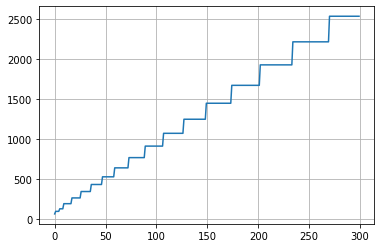

In [24]:
plt.figure()   
plt.plot(len_container, byte_container)
plt.grid()
plt.show()


At the early stage, bytes increased by 32, 64, but later the bytes of the list increased by
320 bytes.



### 5.3.1 Implementing a Dynamic Array

We can implement dynamic array by following steps:

1. Allocate a new array B with larger capcity.
2. Set `B[i] = A[i]` for $i=0,\ldots,n-1$, where $n$ denotes current number of items.
3. Set `A = B`, that is, we henceforth use `B` as the array supporint the list.
4. Insert the new element in the new array.


In [34]:
import ctypes

class DynamicArray:
    """A dynamic array class akin to a simplified Python list"""
    
    def __init__(self):
        """Create an empty array."""
        self._n = 0
        self._capacity = 1
        self._A = self._make_array(self._capacity)
        
    def __len__(self):
        """Return number of elements stored in the array"""
        return self._n
    
    def __getitem__(self, k):
        if not 0<= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]
    
    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:
            self._resize(2 * self._capacity)
        self._A[self._n] = obj
        self._n += 1
    
    def _resize(self, c):
        """Resize internal array to capacity c."""
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self, c):
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()

### 5.3.2 Amortized Analysis of Dynamic Arrays

The strategy of replacing an array with a new, larger aray might at first seem slow, because a single append
operation may require $\Omega(n)$ time to perform, where $n$ is the current number of elements in the array.
However, notice that by doubling the capacity during an array replacement, our new array allows us to add $n$ new
elements before the array must be replaced again. In this way, there are many simple append operations
for each expensive one. This fact allows us to show that performing a series of operations on an initially empty dynamic array is
efficient in terms of its total running time.

Using an algorithmic design pattern called **amortization**, we can show taht performing a sequence of such append operations
on a dynamic array is actually quite efficient.To perform an **amortized analysis**, we use an accounting technique where we 
view the computer as coin-operated appliance that requires the payment of one **cyber-dollar** for a constant amount of computing time.
When an operation is executed, we should have enough cyber-dollars available in our currnet "bank account" to pay for that operation's running time.
Thus, the total amount of cyber-dollars spent for any computation will be proportional to the total time spent on that computation.
The beauty of using this analysis method is that we can overcharge some operations in order to save up cyber-dollars to pay for
others. 

#### Proposition 5.1

Let $S$ be a sequence implemented by means of a dynamic array with initial capacity one, using the strategy of doubling the array size when full.
The total time to perform a series of $n$ append operations in $S$, starting from $S$ being empty, is $O(n)$.

#### Justification:

Let us assume that one cyber-dollar is enough to pay for the execution of each append operation in $S$, excluding the time
spent for growing the array. Also, let us assume that growing the array from size $k$ to size $2k$ requires $k$ cyber-dollars for the time
spent initializing the new array. We shall charge each append operation three cyber-dollars. Thus, we overcharge each append operation that does not 
cause an overflow by two cyber-dollars. Think of the two cyber-dollars profited in an insertion that does not grow the array as being "stored" with the cell in which the element was inserted.
An overflow occurs when the array $S$ has $2^i$ elements, for some integer $i \geq 0$, and the size of the array used by the array representing $S$ is $2^i$.
THus, doubling the size of the array will require $2^i$ cyber-dollars. Fortunately, these cyber-dollars can be 
found stored in cells $2^{i-1}$ through $2^i -1$. Note that the previous overflow occurred when the number of elements became
larger than $2^{i-1}$ for the first time, and thus the cyber-dollars stored in cells $2^{i-1}$ through $2^i-1$ have not yet been spent.
Therefore, we have a valid amortization scheme in which each operation is charged three cyber-dollars and all the computation time is paid for.
That is, we can pay for the execution of $n$ append operations using $3n$ cyber-dollars. In other words, the amortized running time of each append operation
is $O(1)$; hence, the total running time of $n$ append operation is $O(n)$.


### Geometric Increase in Capacity.

Although the proof of Proposition 5.1 relies on the array being doubled each time we exapand, the $O(1)$ amortized bound per operation can be proven for any geometrically increasing progression of array size.
When choosing the geometric base, there exists a trade-off between run-time efficiency and memory usage. WIth a base of 2, if the last insertion causes a resize event,
the array essentially ends up twice as large as it needs to be. If we instead increases the array by only 25% of its current size, we do not risk wasting as much memory in the end, but there will be more
intermediate resize events along the way. The key to the performance is that the amount of additional space is proportional to the current size of the array.

### Beware of Arithmetic Progression

To avoid reserving too much space at once, it might be tempting to implement a dynamic array with a strategy in which a constant number of additional cells are reserved each time an array is resized.
Unfortunately, the overall performance of such a strategy is significantly worse. At an extreme, an increase of only one cell causes each append operation to resize the array, leading to a familiar $1 + 2 + \cdots + n$ summation and 
$\Omega(n^2)$ overall cost. Using increases of 2 or 3 at a time is slightly better, but the overall cost remains quadratic.

Using a fixed increment for each resize, and thus an arithmetic progression of intermediate array sizes, results in an overall time that is quadratic in the number of operations.

#### Proposition 5.2

Performing a series of $n$ append operations on an initially empty dynamic array using a fixed increment with each resize takes $\Omega(n^2)$ time.

A lesson to be learned from Proposition 5.1 and 5.2 is that a subtle difference in an algorithm design can produce drastic differences in the asymptotic performance. and that a careful analysis can provide important insights into the design of a data structrue.

### Memory Usage and Shrinking an Array

Another consequence of the rule of a geometric increase in capacity when appending to a dynamic array is taht the final array size is guaranteed to be proportional to the overall number of elements.
That is, the data structure uses $O(n)$ memory. This is a very desirable property for a data structure.

If a container, such as a Python `list`, provides operations that cause the removal of one or more elements, greater care must be taken to ensure that a dynamic array guarantees $O(n)$ memory usage. THe risk is that
repeated insertions may cause the underlying array to grow arbitrarily large, and that there will no longer be a proportional relationship between the actual number of elements and the array capacity after many elements are removed.

A robust implementation of such a data structure will shrink the underlying array, on occasion, while maintaining the $O(1)$ amortized bound on individual operations.
However, care must be taken to ensure that the structure cannot rapidly oscillate between growing and shrinking the underlying array, in which case the amortized bound would not be achieved.

 ### 5.3.3 Python's List Class
 
 Python is not using a pure geometric progression, nor is it using an arithmetic progression for `list` class.
 
 With that said, it is clear that Python's implementation of the `append` method exhibits amortized constant-time behavior. We can demonstrate this fact experimentally.
 We can get a more accurate measure of the amortized cost per operation by performing a series of $n$ append operations on an initilaly empty list and determining the *average* cost of each. A function to perform that is given by follow:
 
 

In [2]:
from time import time
 
def compute_average(n):
    """Perform n appends to an empty lista nd return average time elapsed."""
    
    data = []
    start = time()
    for k in range(n):
        data.append(None)
    end = time()
    return (end - start) / n

In [6]:
x = [compute_average(i) for i in [10**4, 10**5, 10**6, 10**7]]
x

[1.9941329956054688e-07,
 2.0982503890991211e-07,
 1.9138431549072265e-07,
 1.599764347076416e-07]

Technically the time elapsed between the start and end includes the time to manage the iteration for the for loop, in addition to the `append` calls.
The empirical results of the experiment, for increasingly larger values of $n$, we see higher average cost for the smaller data sets, perhasps in part due to the overhead of the loop range.
There is also natural variance in measuring the amortized cost in this way, because of the impact of the final resize vent relative to $n$. Taken as a whole,
there seems clear evidence that the amortized time for each `append` is independent of $n$.



## 5.4 Efficiency of Python's Sequence Types

### 5.4.1 Python's List and Tuple Classes

|Operation|Running Time|
|---|---|
|`len(data)`|$O(1)$|
|`data[j]`|$O(1)$|
|`data.count(value)`|$O(n)$|
|`data.index(value)`|$O(k+1)$|
|`value in data`|$O(k+1)$|
|`data1==data2`|$O(k+1)$|
|`data[j:k]`|$O(k-j+1)$|
|`data1 + data2`|$O(n_1 + n_2)$|
|`c * data`|$O(cn)$|

The `data1` and `data2` designate instances of the `list` or `tuple` class, and $n_1$ and $n_2$ their respective length. $k$ represents the index of the left most occurence ofr the containment check.

|Operation|Running Time|
|---|---|
|`data[j] = val`|$O(1)$|
|`data.append(value)`|$O(1)$|
|`data.insert(k, value)`|$O(n-k+1)$|
|`data.pop()`|$O(1)$|
|`data.pop(k)`|$O(n-k)$|
|`data.remove(value)`|$O(n)$|
|`data1.extend(data2)`|$O(n_2)$|
|`data.reverse()`|$O(n)$|
|`data.sort()`|$O(n\log n)$|

### 5.4.2 Python's String Class

It is recommended to append string by using list comprehension instead of iteratively calling append, which have to increase its length for every iteration and lead to $O(n^2)$.

In [5]:
doc = "ABcdefGH12414523632ijklmnopqrstuvwXYZ"

In [6]:
letters = ''.join([c for c in doc if c.isalpha()])
letters

'ABcdefGHijklmnopqrstuvwXYZ'

In this case, generator comprehension is preferred to list comprehension in terms of memory management.

In [7]:
letters = ''.join(c for c in doc if c.isalpha())
letters

'ABcdefGHijklmnopqrstuvwXYZ'

## 5.5 Using Array-Based Sequences

### 5.5.1 Storing High Scores for a Game

In [8]:
class GameEntry:
    """Represents one entry of a list of high scores."""
    
    def __init__(self, name, score):
        self._name = name
        self._score = score
    
    @property
    def name(self):
        return self._name
    
    @property
    def score(self):
        return self._score
    
    def __repr__(self):
        return "({0}, {1})".format(self.name, self.score)

In [9]:
GameEntry("John", 100)

(John, 100)

In [11]:
class Scoreboard:
    """Fixed-length sequence of high scores in nondecreasing oreder."""""
    
    def __init__(self, capacity=10):
        
        self._board = [None] * capacity
        self._n = 0
    
    @property
    def board(self):
        return self._board
    
    @property
    def n(self):
        return self._n
    
    def __getitem__(self, k):
        return self.board[k]
    
    def __repr__(self):
        return "\n".join(str(self.board[j]) for j in range(self.n))
    
    def add(self, entry):
        score = entry.score
        good = self.n < len(self.board) or score > self.board[-1].score
        
        if good:
            if self.n < len(self.board):
                self.n += 1
            
            j = self.n - 1
            while j > 0 and self.board[j-1].score < score:
                self.board[j] = self.board[j-1]
                j -= 1
            self.board[j] = entry

### 5.5.2 Sorting a Sequence

In [14]:
def insertion_sort(A):
    
    for k in range(1, len(A)):
        cur = A[k]
        j = k
        while j > 0 and A[j-1] > cur:
            A[j] = A[j-1]
            j -= 1
        A[j]= cur
        

In [15]:
A = [5, 2, 4, 1]

In [16]:
insertion_sort(A)

In [17]:
A

[1, 2, 4, 5]

### 5.5.3 Simple Cryptography

In [18]:
class CaesarCipher:
    
    def __init__(self, shift):
        
        encoder = [None] * 26
        decoder = [None] * 26
        
        for k in range(26):
            encoder[k] = chr((k + shift) % 26 + ord('A'))
            decoder[k] = chr((k - shift) % 26 + ord('A'))
        self._forward = ''.join(encoder)
        self._backward = ''.join(decoder)
        
    def encrypt(self, message):
        return self._transform(message, self._forward)
    
    def decrypt(self, message):
        return self._transform(message, self._backward)
    
    def _transform(self, original, code):
        msg = list(original)
        for k in range(len(msg)):
            if msg[k].isupper():
                j = ord(msg[k]) - ord('A')
                msg[k] = code[j]
        return ''.join(msg)
    

cipher = CaesarCipher(3)
message = "THE EAGLE IS IN PLAY; MEET AT JOE'S"
coded = cipher.encrypt(message)
print("Secret: ", coded)
answer = cipher.decrypt(coded)
print("Message: ", answer)
            

Secret:  WKH HDJOH LV LQ SODB; PHHW DW MRH'V
Message:  THE EAGLE IS IN PLAY; MEET AT JOE'S
